In [2]:
#Imports
import pandas as pd
import numpy as np
import os,glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
#import holidays
#from holidays import country_holidays
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [3]:
# File location
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Loading Data

In [4]:
# Full file

# Get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
chicago = pd.concat([pd.read_csv(f) for f in crime_files])
chicago

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
3,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
4,1333483,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2212,22.0,NaN,41.677371,-87.683218
...,...,...,...,...,...,...,...,...,...,...,...,...
105660,13097531,06/06/2023 12:50:00 AM,THEFT,$500 AND UNDER,STREET,False,False,124,1.0,28.0,41.869414,-87.643731
105661,13097489,06/06/2023 12:50:00 AM,CRIMINAL DAMAGE,TO VEHICLE,ALLEY,False,False,822,8.0,23.0,41.786042,-87.716317
105662,13098630,06/06/2023 12:50:00 PM,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,POLICE FACILITY / VEHICLE PARKING LOT,False,False,213,2.0,3.0,41.830612,-87.623247
105663,13097534,06/06/2023 12:51:00 AM,ASSAULT,SIMPLE,RESIDENCE,True,True,1531,15.0,37.0,41.897716,-87.755669


In [5]:
# setting the format for datetime
date_format = "%m/%d/%Y %H:%M:%S %p"

# Converting to Datetime
chicago['Datetime'] = pd.to_datetime(chicago['Date'], format=date_format)
chicago = chicago.sort_values('Datetime')

# Set datetime as index
chicago = chicago.set_index('Datetime')
chicago

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,,
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
2001-01-01 01:00:00,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
2001-01-01 01:00:00,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629
2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06 12:50:00,13097489,06/06/2023 12:50:00 AM,CRIMINAL DAMAGE,TO VEHICLE,ALLEY,False,False,822,8.0,23.0,41.786042,-87.716317
2023-06-06 12:50:00,13097531,06/06/2023 12:50:00 AM,THEFT,$500 AND UNDER,STREET,False,False,124,1.0,28.0,41.869414,-87.643731
2023-06-06 12:50:00,13098630,06/06/2023 12:50:00 PM,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,POLICE FACILITY / VEHICLE PARKING LOT,False,False,213,2.0,3.0,41.830612,-87.623247


# Cleaning Data

In [6]:
# Dropping columns
chicago.drop(columns = ['ID', 'Latitude', 'Longitude', 'Arrest',
                        'Domestic', 'Location Description', 'Description',
                        'Date'], inplace = True)
chicago

,Primary Type,Beat,District,Ward
Datetime,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,1724,17.0,NaN
2001-01-01 01:00:00,WEAPONS VIOLATION,1135,11.0,NaN
2001-01-01 01:00:00,SEX OFFENSE,1434,14.0,NaN
2001-01-01 01:00:00,MOTOR VEHICLE THEFT,513,5.0,NaN
2001-01-01 01:00:00,BATTERY,1632,16.0,NaN
...,...,...,...,...
2023-06-06 12:50:00,CRIMINAL DAMAGE,822,8.0,23.0
2023-06-06 12:50:00,THEFT,124,1.0,28.0
2023-06-06 12:50:00,OTHER OFFENSE,213,2.0,3.0


In [7]:
chicago['Total_Incidents'] = 1
chicago['Year'] = chicago.index.year
chicago['Month'] = chicago.index.month
chicago['MonthName'] = chicago.index.month_name()
chicago['HourofDay']  = chicago.index.hour
chicago

,Primary Type,Beat,District,Ward,Total_Incidents,Year,Month,MonthName,HourofDay
Datetime,,,,,,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,1724,17.0,NaN,1,2001,1,January,1
2001-01-01 01:00:00,WEAPONS VIOLATION,1135,11.0,NaN,1,2001,1,January,1
2001-01-01 01:00:00,SEX OFFENSE,1434,14.0,NaN,1,2001,1,January,1
2001-01-01 01:00:00,MOTOR VEHICLE THEFT,513,5.0,NaN,1,2001,1,January,1
2001-01-01 01:00:00,BATTERY,1632,16.0,NaN,1,2001,1,January,1
...,...,...,...,...,...,...,...,...,...
2023-06-06 12:50:00,CRIMINAL DAMAGE,822,8.0,23.0,1,2023,6,June,12
2023-06-06 12:50:00,THEFT,124,1.0,28.0,1,2023,6,June,12
2023-06-06 12:50:00,OTHER OFFENSE,213,2.0,3.0,1,2023,6,June,12


## 1) Comparing Police Districts:
- Which district has the most crimes? 
- Which district has the least?

In [8]:
district_crimes_counts = chicago['District'].value_counts()

# Find the district with the most crimes
district_most_crimes = district_crimes_counts.idxmax()

# Find the district with the least crimes
district_least_crimes = district_crimes_counts.idxmin()

# Print the results
print(f"District with the most crimes:", district_most_crimes)
print("District with the least crimes:", district_least_crimes)

District with the most crimes: 8.0
District with the least crimes: 21.0


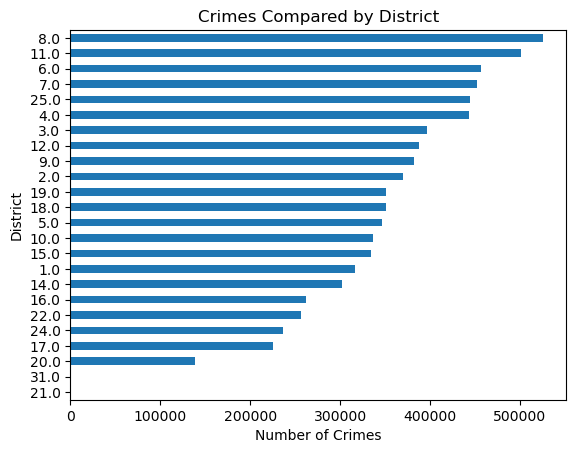

In [10]:
district_crimes_counts.sort_values().plot(kind='barh')
plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.title('Crimes Compared by District')
plt.show()